# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-28 23:17:02.385086: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 23:17:02.385262: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-28 23:17:02.387241: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-28 23:17:02.413240: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 23:17:02.928161: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 10000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4: accuracy 10.700%
Epoch 2/4: accuracy 10.040%
Epoch 3/4: accuracy 10.160%
Epoch 4/4: accuracy 10.160%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-8  5  5 ... -7  5  7]
 [-4 -5  7 ... -4 -4  5]] ...

 [[-4  1 -8 ... -4 -7 -4]
 [ 2  2  2 ... -2 -3 -3]
 [-2 -2 -2 ... -2 -2  1]
 ...
 [-4 -4  1 ... -4 -4 -6]
 [-2 -4 -2 ...  8  2 -3]
 [-5 -4 -6 ... -6  1  2]]

 [[ 1  1 -4 -3 -4 -4 -4  1  1  1 -3 -3 -3 -3 -3  1 -3 -4 -5 -4 -4  1  1  1
  -2  1  1 -4  1 -4 -5 -4 -3  1  1 -4 -3 -4 -4 -4 -3 -3 -3 -2 -4  1 -3 -3
   1  1 -3 -3  1 -5  1 -3 -5  1 -3 -3 -3 -3 -3  1 -4 -3 -3 -4 -4 -3 -4  1
  -3 -3  1  1 -4 -4  1 -4 -4 -3 -4  1  1 -4 -3 -5 -3 -4 -4 -3 -4 -5  1 -3
  -3 -4  1  1 -5 -4 -4 -4 -4 -3 -3 -3 -3 -3 -4 -3 -4 -3 -3 -4 -4 -3 -3 -4
   1 -4 -3 -3 -5 -4 -3 -4]
 [-3 -5 -5  1 -4 -2  2 -4 -4 -5 -5 -3 -5 -3 -3 -4 -3 -5 -3 -2 -3 -3 -2 -4
  -3 -3 -3 -2  1 -2 -2 -3  4 -1 -3 -2 -3 -5  2 -3  1 -3 -5  1 -1 -4 -3 -3
  -3 -3 -4 -3  1  2 -3  1 -3 -3  1 -3 -3 -2 -3 -3 -2 -3 -3 -2 -2  1 -4  1
  -3  2 -2  1 -2 -2 -4  1 -2 -3 -5 -3 -3 -4 -3 -2 -2 -2 -2  1 -3  2 -4 -5
  -3 -3 -3 -3 -2 -2  2 -2 -2 -3  1  1 -3 -3 -5 -3  2  1 -3 -2 -4 -3 -3 -3
   2  2 -3 -3 -2


 [  0   0   0   0   0 255 255 255   0   0   0 255   0   0 255   0   0   0
 255 255 255   0   0 255   0   0   0 255   0   0   0 255   0   0   0   0
 255   0   0 255 178   1   0   0 255   0   0   0 255 255   0   0   0   0
   0 255   0   0 255 255   0 255   0   0   0   0 255 255 255 255   0 255
   0   0   0 255   0 255 255   0  79   0   0   0   0 255   0 255   0 255
 255   0   0   0 255   0   0   0   0 179   0 255   0   0 255   0   0   0
   0   0 255   0   0 159   0   0   0 255   0   0   0 255   0   0   0   0
   0 255]

 [  0 255 255   0 255 255 255 255 255   0 255   0   0 208   0 255   0 255
 255   0   0 255   0   0   0   0   0   0 255   0   0   0   0   0   0   0
 255 255   0   0 255   0 255   0   0 255   0   0 255 255   0 255   0   0
 255 255 255 255 255 255   0 255   0   0   0 255   0   0 255   0 255 255
   0 255   0 255 255 255 255   0 255 255   0 255   0 255   0 255   0   0
   0 255 255 255   0 255 255   0   0   0 255   0   0 255   0 255   0 255
   0   0   0 255   0 255   0   0 255 

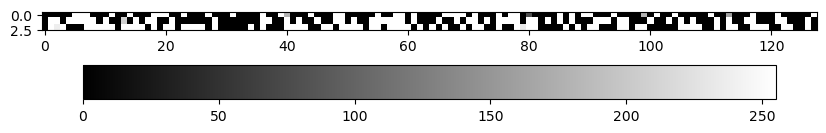


 [  0 255   0 255 255   0   0   0 255 255]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
print("\n", model.last_intermediate_outputs[1])
print("\n", model.last_intermediate_outputs[2])
plt.show()
print("\n", model.last_outputs)

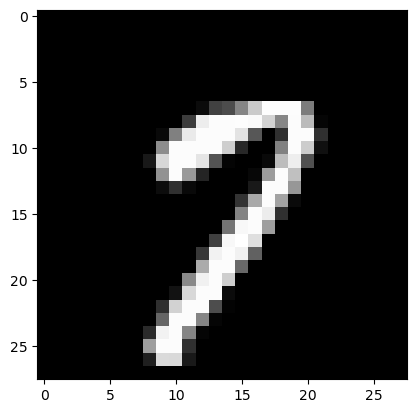

In [9]:
plt.imshow(train_images[N-1].reshape(28,28), cmap="grey")